In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import exp
import random

# PROBLEM 2 Simple decision strategy for flower sampling by bees.

In [3]:
#%% defining plot function
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 11#7.
sns.set(style = 'whitegrid',context = 'notebook', palette = 'dark')

# (a)

In [4]:
def softmax(beta, d):
    return 1/(1+ exp(beta*d))

softmax = np.vectorize(softmax)

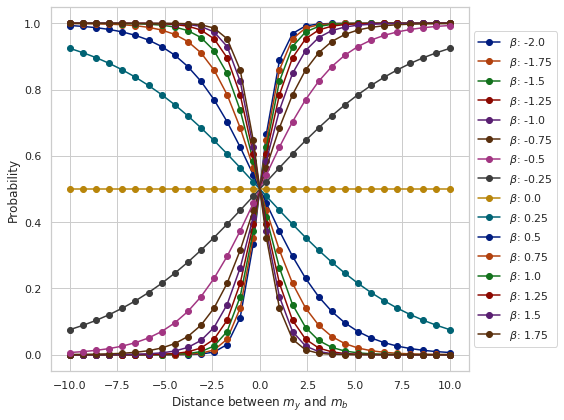

In [24]:
betas = np.arange(-2, 2, step = 0.25)
d_space = np.linspace(-10,10, 30)
legend = []
# p_betas = np.asarray([softmax(beta, d_space) for beta in betas])
for beta in betas:
    p_betas = softmax(beta, d_space)
    plt.plot(d_space, p_betas, marker='o', markersize=6)
    legend.append(r'$\beta$: {}'.format(beta))
    
plt.legend(legend, loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xlabel(r"Distance between $m_y$ and $m_b$")
plt.ylabel("Probability")
plt.savefig('fig7_report2.png', dpi=600)
plt.show()

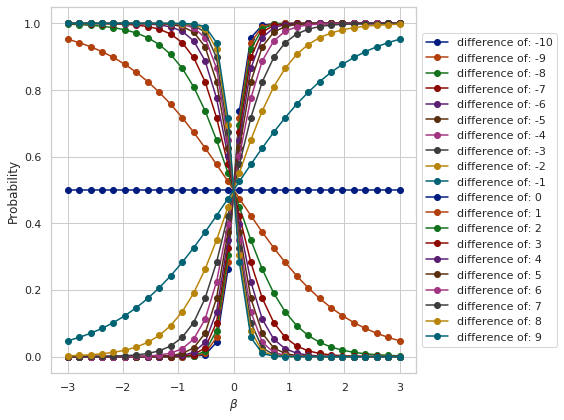

In [25]:
ds = np.arange(-10, 10, step = 1)
beta_space = np.linspace(-3,3, 30)
legend = []
for i, d in enumerate(ds):
    p_d = softmax(beta_space, d)
    plt.plot(beta_space, p_d, marker='o', markersize=6)
    legend.append('difference of: {}'.format(d))
plt.legend(legend, loc='center left', bbox_to_anchor=(1, 0.5))    
plt.xlabel(r"$\beta$")
plt.ylabel("Probability")
plt.savefig('fig8_report2.png', dpi=600)
plt.show()

# (b) Dumb bee

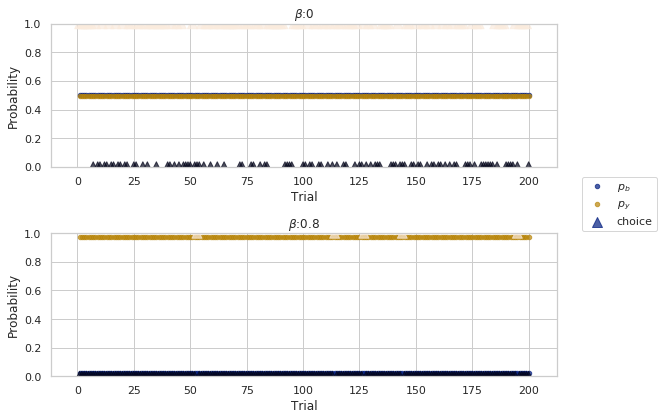

In [32]:
trial = np.arange(1,201)

my = np.ones(200)*5
mb = np.zeros(200)

betas = [0, 0.8]

fig, ax = plt.subplots(2)

for i, beta in enumerate(betas):
    pb = softmax(beta = beta, d = (my-mb))
    py = 1 - pb
    
    random = np.random.sample(200)
    
    choice = random <= pb
       
    ax[i].scatter(trial,pb+0.005, alpha = 0.7, color= 'b', s = 20)
    ax[i].scatter(trial,py-0.005, alpha = 0.7, color = 'y',  s = 20)
    ax[i].scatter(trial,choice, alpha = 0.7, c = choice,  s = 100, marker = '^')
    #ax[i].legend([r'$p_b$', r'$p_y$'], loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set_ylim([0, 1])
    ax[i].set_title(r'$\beta$:{}'.format(beta))
    ax[i].set_xlabel("Trial")
    ax[i].set_ylabel("Probability")
    

fig.legend([r'$p_b$', r'$p_y$', 'choice'], loc='center left', bbox_to_anchor=(1, 0.5))
#plt.subplots_adjust(hspace= 0.2)
plt.savefig('fig9_report2.png', dpi=600)
plt.show()
    

# (C) Smart Bee

In [20]:
def smart_update(ry, rb, my_i, mb_i, e = 0.2, beta = 0.5, trials = 200):
    pb = np.zeros(trials)
      
    mb = np.zeros(trials) 
    my = np.zeros(trials)
    
    mb[0] = mb_i
    my[0] = my_i
    
    choice = np.zeros(trials)
    
    for i in range(trials-1):
        pb[i] = softmax(beta = beta, d =(my[i] -mb[i]))
        
        if np.random.rand() <= pb[i]:
            mb[i+1] = mb[i] +e*(rb[i]- mb[i])
            my[i+1] = my[i]
            choice[i+1] = 1 
        else:
            mb[i+1] = mb[i]
            my[i+1] = my[i] +e*(ry[i]- my[i])
    
    return mb, my, pb

In [30]:
rb_1 = np.ones(100)*8
rb_2 = np.ones(100)*2

ry_1 = np.ones(100)*2
ry_2 = np.ones(100)*8

rb = np.concatenate((rb_1, rb_2))
ry = np.concatenate((ry_1, ry_2))

trials = np.arange(1,201)

my_i = 5 
mb_i = 0

betas = [0, 1]


/home/nicobruno92/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


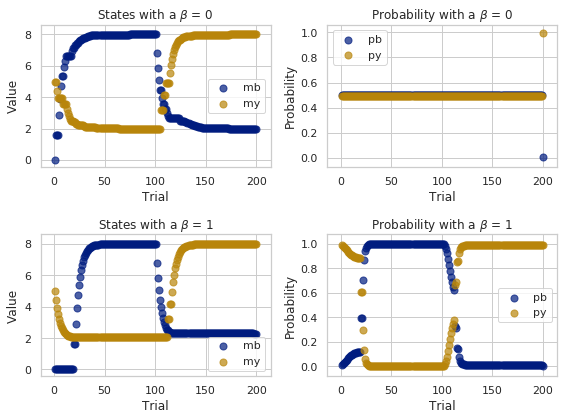

In [31]:
fig, ax = plt.subplots(2, 2)
for i, beta in enumerate(betas):
    
    mb, my, pb = smart_update(ry, rb, my_i = 5, mb_i =0, beta = beta)

    ax[i,0].scatter(trial,mb, alpha = 0.7, color= 'b', s = 50)
    ax[i,0].scatter(trial,my, alpha = 0.7, color= 'y', s = 50)
    ax[i,0].legend(['mb', 'my'])
    ax[i,0].set_title(r'States with a $\beta$ = {}'.format(beta))
    ax[i, 0].set_xlabel("Trial")
    ax[i, 0].set_ylabel("Value")
    py = 1 - pb

    ax[i,1].scatter(trial,pb+0.005, alpha = 0.7, color= 'b', s = 50)
    ax[i,1].scatter(trial,py-0.005, alpha = 0.7, color= 'y', s = 50)
    ax[i,1].legend(['pb', 'py'])
    ax[i,1].set_title(r'Probability with a $\beta$ = {}'.format(beta))
    ax[i,1].set_xlabel("Trial")
    ax[i,1].set_ylabel("Probability")

plt.savefig('fig10_report2.png', dpi=600)
fig.show()